In [1]:
words = []
for line in open("hw4_vocab.txt"):
  words.append(line.split()[0])

counts = []
for line in open("hw4_unigram.txt"):
  counts.append(int(line.split()[0]))

bigram = []
for line in open("hw4_bigram.txt"):
  bigram.append([int (x) for x in line.split()])

In [2]:
unigram = list(zip(words, counts))

### (a)

In [3]:
probabilities = []
for i in range(0, 499):
    probabilities.append([words[i], counts[i]/sum(counts)])

In [4]:
[v for v in probabilities if v[0][0] == 'N' or v[0][0] == 'n']

[['NINETEEN', 0.0028588174836726445],
 ['NOT', 0.0021457733600835156],
 ['NEW', 0.001900350279776441],
 ['NINE', 0.0017613053303564415],
 ['NINETY', 0.0012920576727483372],
 ['NO', 0.0010485914217056834],
 ['NOW', 0.0007126160671875371],
 ['N.', 0.0006647838218553515],
 ['NATIONAL', 0.0005965149408928713],
 ['NEXT', 0.00042879021256620473],
 ['NEWS', 0.0004290959671387705],
 ['NUMBER', 0.0003488781974804209],
 ['NORTH', 0.0002554640604701336],
 ['NEVER', 0.0002425367571420538],
 ['NIGHT', 0.00023650727697105726],
 ['NEARLY', 0.0002124871977502921],
 ['NEAR', 0.00021042029683974764],
 ['NEED', 0.00020837785629500844]]

### (b)

In [5]:
words[35]

'HAVE'

In [6]:
biDist = [[words[v[1]-1],v[2]] for v in bigram if v[0] == 36]

In [7]:
s = sum([v[1] for v in biDist])
biDist = [[v[0],v[1]/s] for v in biDist]

In [8]:
biDist = sorted(biDist, key=lambda x: x[1])

In [9]:
biDist[-10:]

[['AN', 0.010897736780882022],
 ['HAD', 0.01128956551907104],
 ['SAID', 0.013040550192853207],
 ['NOT', 0.01344462357911063],
 ['NO', 0.015738454317258833],
 ['THE', 0.028934103385645192],
 ['A', 0.06311299769392462],
 ['TO', 0.08213301769351646],
 ['BEEN', 0.17246178649415317],
 ['<UNK>', 0.4116813942572601]]

### (c)

In [10]:
import math

def probUnigram(word):
    return probabilities[words.index(word)][1]

def probBigram(word, evidence):
    dist = [[words[v[1]-1],v[2]] for v in bigram if v[0] == words.index(evidence)+1]
    psum = sum([v[1] for v in dist])
    prob = [v[1] for v in dist if v[0] == word]
    if len(prob) == 0:
        return 0
    else:
        return prob[0]/psum

In [11]:
def logLikelihoods(sentence):
    lu = 1
    lb = 1
    sent = sentence.split()

    for i in range(0, len(sent)):
        lu = lu * probUnigram(sent[i])
        if i == 0:
            lb = lb * probBigram(sent[i], "<s>")
        else:
            lb = lb * probBigram(sent[i], sent[i-1])
    if lu != 0:
        lu = math.log(lu)
    else:
        lu = "UNDEFINED"
    
    if lb != 0:
        lb = math.log(lb)
    else:
        lb = "UNDEFINED"
    return lu, lb
    

In [12]:
lu, lb = logLikelihoods("TEN BILLION DOLLARS DIDN'T LAST VERY LONG")
print(lu)
print(lb)

-50.562145130091004
-43.04832187498447


### (d)

In [13]:
lu, lb = logLikelihoods("THE RECENT OFFICIALS SAID THEY INCORPORATED PRICES")
print(lu)
print(lb)

-44.72653897141283
UNDEFINED


In [14]:
print(probBigram("THE", "<s>"))
print(probBigram("RECENT", "THE"))
print(probBigram("OFFICIALS", "RECENT"))
print(probBigram("SAID", "OFFICIALS"))
print(probBigram("THEY", "SAID"))
print(probBigram("INCORPORATED", "THEY"))
print(probBigram("PRICES", "INCORPORATED"))

0.15865263383617936
0.0007153649126219887
0
0.22033277138459284
0.020327686493360808
1.1064884482606001e-05
0


### (e)

In [15]:
def mixedProb(word, evidence, l):
    return (1-l)*probUnigram(word) + l*probBigram(word, evidence)

def mixedLL(sentence, l):
    lm = 1
    sent = sentence.split()

    for i in range(0, len(sent)):
        if i == 0:
            lm = lm * mixedProb(sent[i], "<s>", l)
        else:
            lm = lm * mixedProb(sent[i], sent[i-1], l)
    return math.log(lm)

In [16]:
lambdas = [i/100 for i in range(0,100)]
lls = [mixedLL("THE RECENT OFFICIALS SAID THEY INCORPORATED PRICES", l) for l in lambdas]

In [17]:
import matplotlib.pyplot as plt

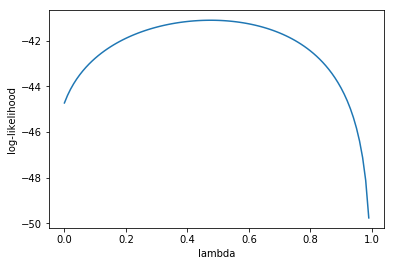

In [18]:
plt.plot(lambdas, lls)
plt.xlabel('lambda')
plt.ylabel('log-likelihood')
plt.show()

In [19]:
lambdas[lls.index(max(lls))]

0.48